### 1 Read test files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

msl_test = pd.read_csv('datasets/msl_test.csv')

# Read label files
msl_test_label = pd.read_csv('datasets/msl_test_label.csv')

### 2. Draw time series plots with anomaly regions:

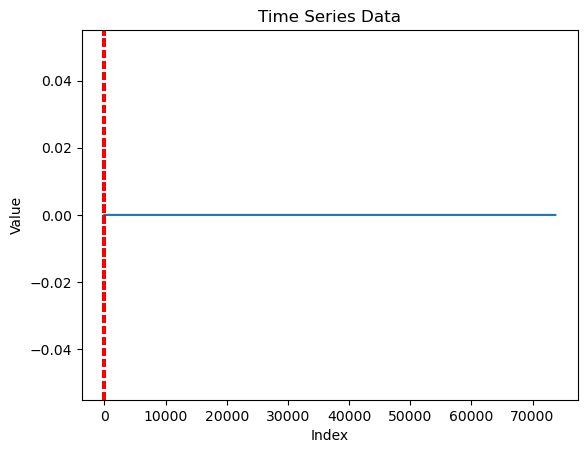

In [5]:
plt.plot(msl_test.index, msl_test.iloc[:, 1])  # Assuming the timestamps are not provided in the dataset
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time Series Data')

# Highlight anomaly regions
for i in range(len(msl_test_label)):
    plt.axvline(x=msl_test_label.iloc[i, 0], color='red', linestyle='--')  # Assuming the anomaly points are specified by index
plt.show()

### 3. Perform EDA and find out root cause

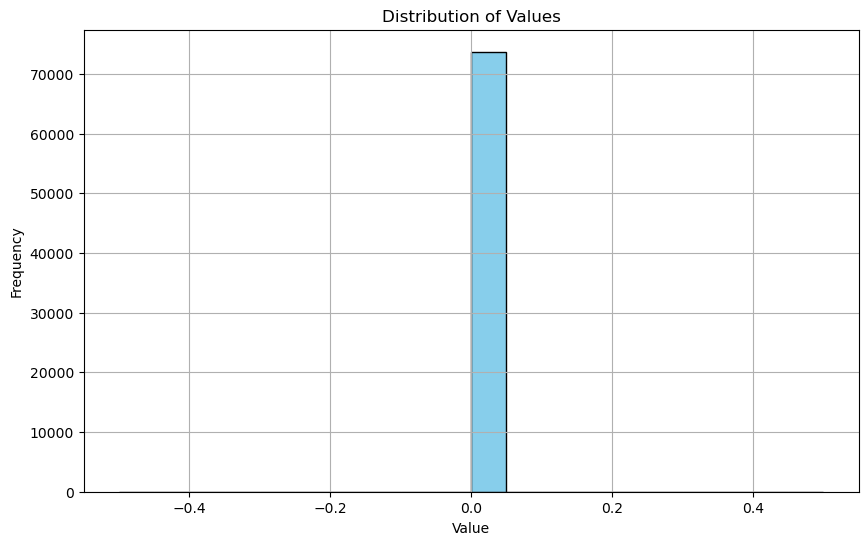

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(msl_test.iloc[:, 1], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

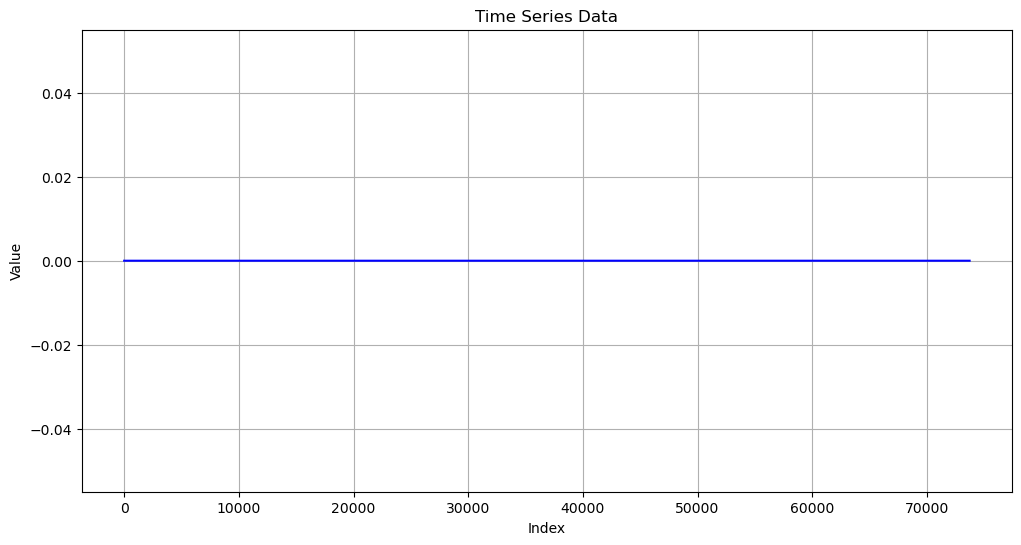

In [8]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(msl_test.index, msl_test.iloc[:, 1], color='blue')
plt.title('Time Series Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### 4. Find out the variables which are the root cause for the anomaly:  

In [9]:
# Extract anomaly regions based on indices provided in the label file
anomaly_indices = msl_test_label.iloc[:, 0].tolist()
anomaly_values = msl_test.iloc[anomaly_indices, 1]

# Calculate summary statistics for anomaly regions
anomaly_stats = anomaly_values.describe()

# Calculate summary statistics for non-anomaly regions
non_anomaly_values = msl_test.drop(anomaly_indices, axis=0).iloc[:, 1]
non_anomaly_stats = non_anomaly_values.describe()

# Compare the statistics
print("Summary statistics for anomaly regions:")
print(anomaly_stats)
print("\nSummary statistics for non-anomaly regions:")
print(non_anomaly_stats)

Summary statistics for anomaly regions:
count    73729.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: 1, dtype: float64

Summary statistics for non-anomaly regions:
count    73727.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: 1, dtype: float64
